# Ground Truth

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle

%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 8)
plt.rcParams['image.interpolation'] = 'nearest'

### Pascal VOC

In [2]:
from data_voc import GTUtility
gt_util = GTUtility('data/VOC2007/')

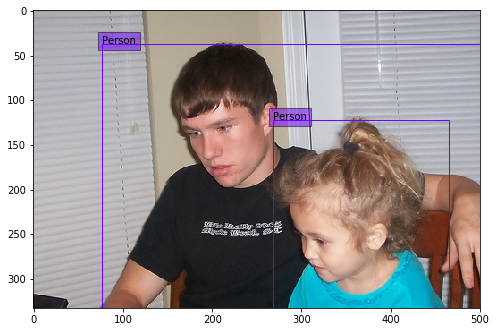

In [3]:
idx, img, gt = gt_util.sample()
plt.imshow(img)
gt_util.plot_gt(gt)
plt.show()

In [4]:
print(gt_util)

Background              0
Aeroplane             331
Bicycle               418
Bird                  599
Boat                  398
Bottle                634
Bus                   272
Car                  1644
Cat                   389
Chair                1432
Cow                   356
Diningtable           310
Dog                   538
Horse                 406
Motorbike             390
Person               7001
Pottedplant           625
Sheep                 353
Sofa                  425
Train                 328
Tvmonitor             367

images               5011
objects             17216
per image            3.44
no annotation           0



### MS COCO

In [5]:
from data_coco import GTUtility
gt_util = GTUtility('data/COCO', validation=True)

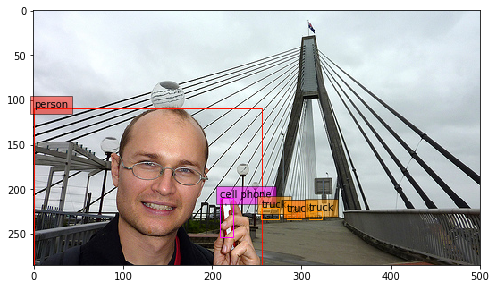

In [6]:
idx, img, gt = gt_util.sample()
plt.imshow(img)
gt_util.plot_gt(gt)
plt.show()

image 40137
objects 291875
objects per image 7.27


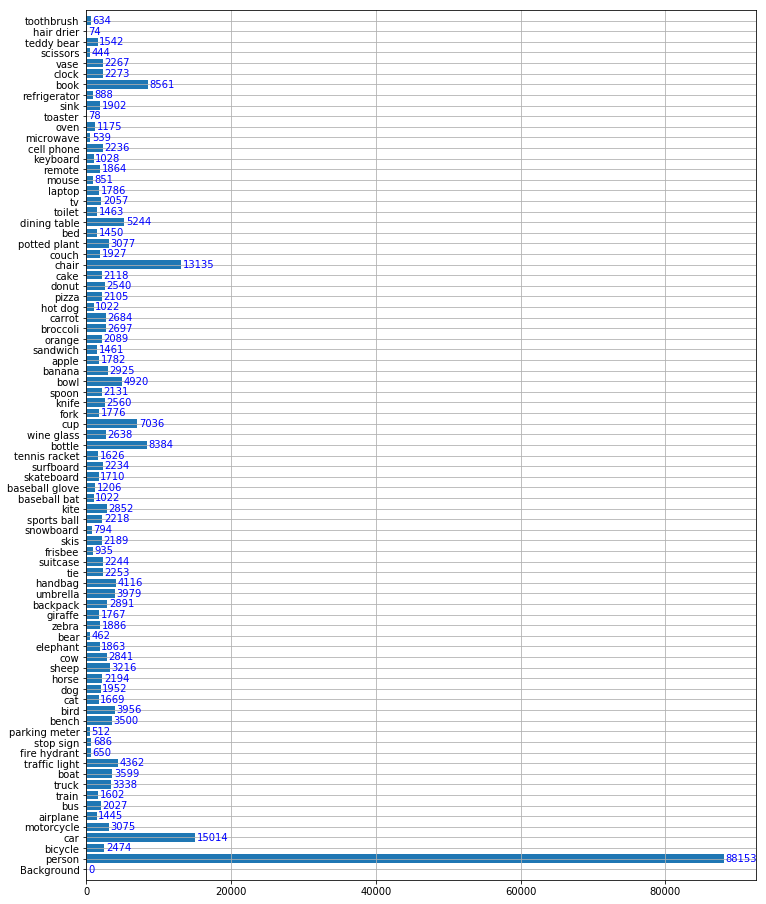

In [7]:
print('image %i' % (gt_util.num_samples))
print('objects %i' % (gt_util.num_objects))
print('objects per image %.2f' % (gt_util.num_objects / gt_util.num_samples))

plt.figure(figsize=(12,16))
y = range(gt_util.num_classes)
plt.barh(y, gt_util.stats, align='center')
plt.yticks(y, gt_util.classes)
plt.ylim(y[0]-1, y[-1]+1)
plt.grid()
ax = plt.gca()
for i, v in enumerate(gt_util.stats):
    ax.text(v+200, i-.25, int(v), color='b')
plt.show()

In [8]:
gt = gt_util.convert_to_voc()

In [9]:
gt1, gt2 = GTUtility.split(gt, 0.6)

In [10]:
gt3 = GTUtility.merge(gt1,gt2)

In [11]:
gt.num_samples, gt3.num_samples

(32467, 32467)

### ICDAR2015 FST

In [12]:
from data_icdar2015fst import GTUtility
gt_util = GTUtility('data/ICDAR2015_FST/')
gt_util_test = GTUtility('data/ICDAR2015_FST/', test=True, polygon=False)

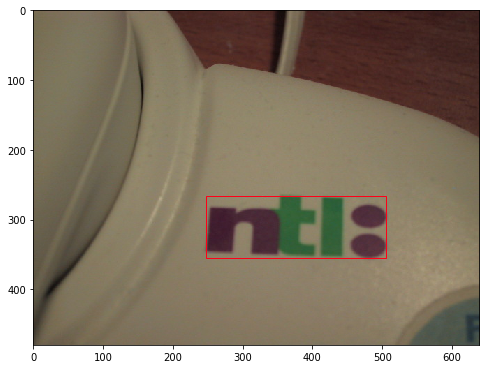

['ntl:']


In [13]:
idx, img, gt = gt_util.sample() # TODO: index 83 is fucked up?
plt.imshow(img)
gt_util.plot_gt(gt, show_labels=False)
plt.show()
print(gt_util.text[idx])

In [14]:
print(gt_util.num_samples, gt_util_test.num_samples)

229 233


### ICDAR2015 IST

In [15]:
from data_icdar2015ist import GTUtility
gt_util = GTUtility('data/ICDAR2015_IST/')
gt_util_test = GTUtility('data/ICDAR2015_IST/', test=True)

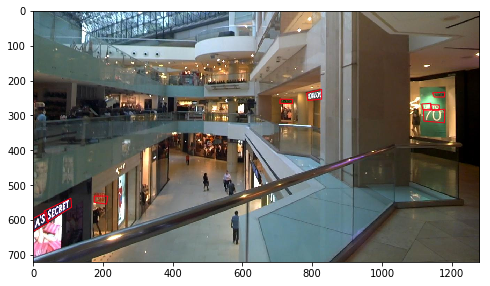

['###', 'sale', '###', '###', '70%', '###', 'SECRET', "A'S", '###']


In [16]:
idx, img, gt = gt_util.sample()
plt.imshow(img)
gt_util.plot_gt(gt, show_labels=False)
plt.show()
print(gt_util.text[idx])

In [17]:
print(gt_util.num_samples, gt_util_test.num_samples)

1000 500


### MSRA TD500

In [18]:
from data_td500 import GTUtility
gt_util = GTUtility('data/MSRA-TD500/')

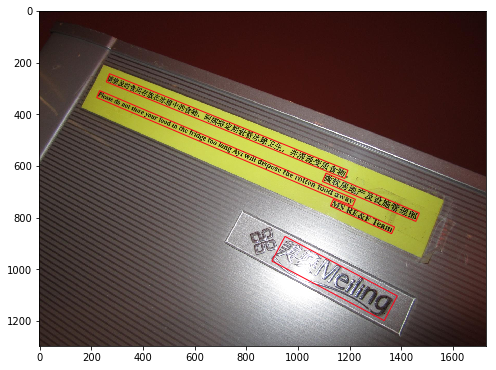

In [19]:
idx, img, gt = gt_util.sample()
plt.imshow(img)
gt_util.plot_gt(gt, show_labels=False)
plt.show()

### SVT

In [20]:
from data_svt import GTUtility
gt_util = GTUtility('data/SVT/')

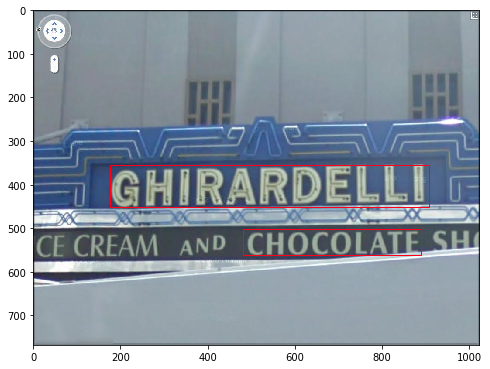

In [21]:
idx, img, gt = gt_util.sample()
plt.imshow(img)
gt_util.plot_gt(gt, show_labels=False)
plt.show()

### COCO-Text

In [22]:
from data_cocotext import GTUtility
gt_util = GTUtility('data/COCO-Text', polygon=False)

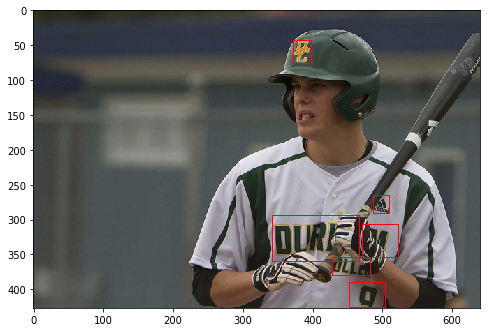

In [23]:
idx, img, gt = gt_util.sample()
plt.imshow(img)
gt_util.plot_gt(gt, show_labels=False)
plt.show()

### SynthText

In [24]:
# for TextBoxes

from data_synthtext import GTUtility
gt_util = GTUtility('data/SynthText/', max_slope=10)

file_name = 'gt_util_synthtext_horizontal10.pkl'
pickle.dump(gt_util, open(file_name,'wb'))
#with open(file_name, 'rb') as f:
#    gt_util = pickle.load(f)

print(gt_util)

loding ground truth data...
processing samples...


/home/mmh-mv/playground/ssd_detectors/data_synthtext.py:86: RuntimeWarning: divide by zero encountered in true_divide
  angles = np.arctan(np.divide(boxes[:,2]-boxes[:,0], boxes[:,3]-boxes[:,1]))


Background              0
Text              4361446

images             788511
objects           4361446
per image            5.53
no annotation           0



In [25]:
# for SegLink and TextBoxes++

from data_synthtext import GTUtility
gt_util = GTUtility('data/SynthText/', polygon=True)

file_name = 'gt_util_synthtext_seglink.pkl'
pickle.dump(gt_util, open(file_name,'wb'))
#with open(file_name, 'rb') as f:
#    gt_util = pickle.load(f)

print(gt_util)

loding ground truth data...
processing samples...
Background              0
Text              7266338

images             858749
objects           7266338
per image            8.46
no annotation           0



In [26]:
gtu1, gtu2 = GTUtility.split(gt_util, 0.001)

file_name = 'gt_util_synthtext_seglink_xxs.pkl'
pickle.dump(gtu1, open(file_name,'wb'))
#with open(file_name, 'rb') as f:
#    gtu1 = pickle.load(f)

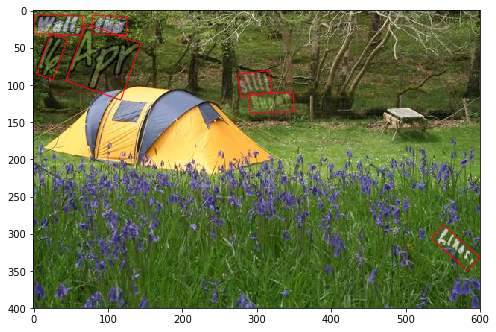

In [27]:
idx, img, gt = gt_util.sample()
plt.imshow(img)
gt_util.plot_gt(gt, show_labels=False)
plt.show()